## Baseball case study

### Summary 
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors



-- Output: Number of predicted wins (W)



-- General Approach: For predicting the number of wins a baseball team will attain -- based on the given input features, a linear regression approach is neccessary. 

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset to the notebook
df=pd.read_csv("Baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df=df.rename(columns={'W':'wins','R':'Runs', 'AB':'At Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'HR':'Homeruns', 'BB':'Walks', 'SO':'Strikeouts','SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs', 'ERA':'Earned Run Average', 'CG':'Complete Game', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'})


In [4]:
df.head()

,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
#Let's check the shape of the dataset
df.shape
#The dataset has 30 rows and 17 columns including the target 'wins'

(30, 17)

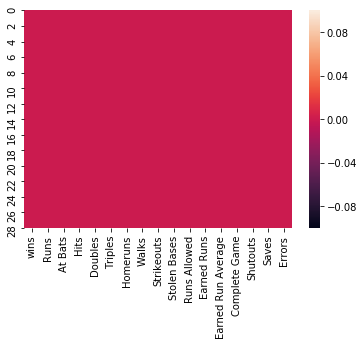

In [6]:
#Let's check if there are any missing values in the dataset
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()
#There are no missing values in the dataset

wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

### Univariate Analysis

In [8]:
df.columns

Index(['wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average', 'Complete Game', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

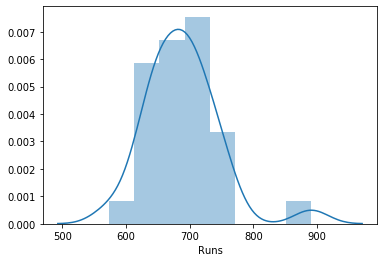

In [9]:
sns.distplot(df['Runs'])

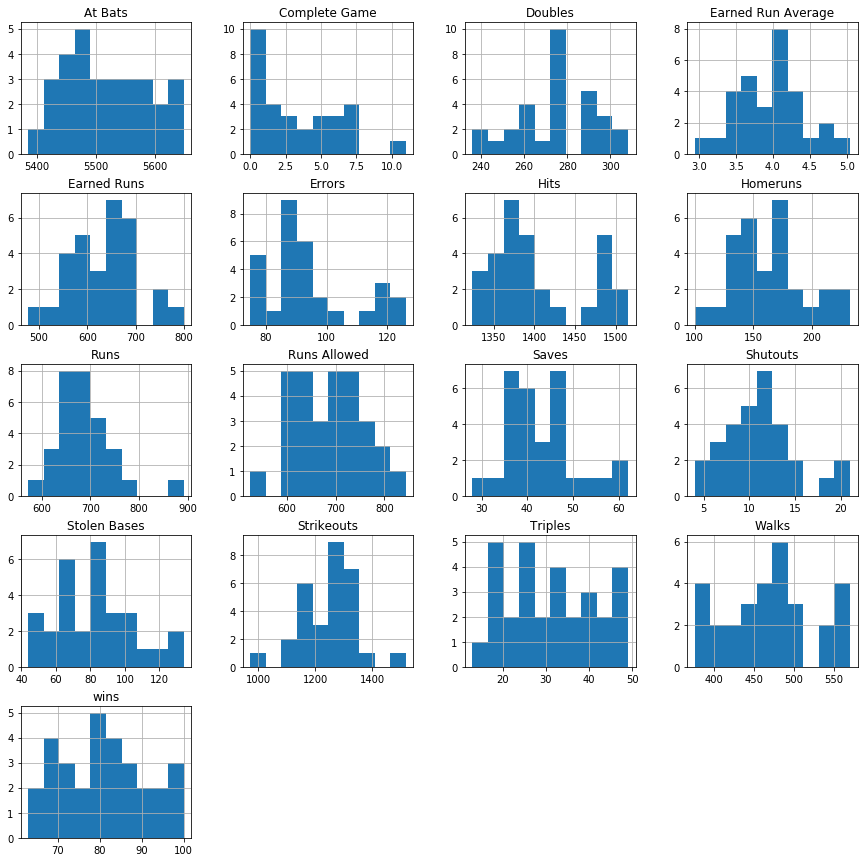

In [10]:
df.hist(bins=10,figsize=(15,15))
plt.show()

Observations:
1. Most At Bats are between 5400 and 5500.
2. Most of the complete Game are one and two.
3. Between 270 to 280 most of the doubles are scored.
4. Average earned run is between 4 and 4.2
5. Most of the runs earned are between 650-700.
6. Most errors are occuring between 85-90.
7. Most hits are between 1360 to 1380.
8. Most runs allowed are between 600-660 and 680-750.
9. Most walks are between 470-500
10. Most strikeouts are between 1250-1300
11. Between 78-85 most wins are recorded.


{'whiskers': [<matplotlib.lines.Line2D at 0x17915d65e88>,
 'caps': [<matplotlib.lines.Line2D at 0x17915d65fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x17915d654c8>,
 'medians': [<matplotlib.lines.Line2D at 0x17915d69f88>,
 'fliers': [<matplotlib.lines.Line2D at 0x17915d6a748>,
 'means': []}

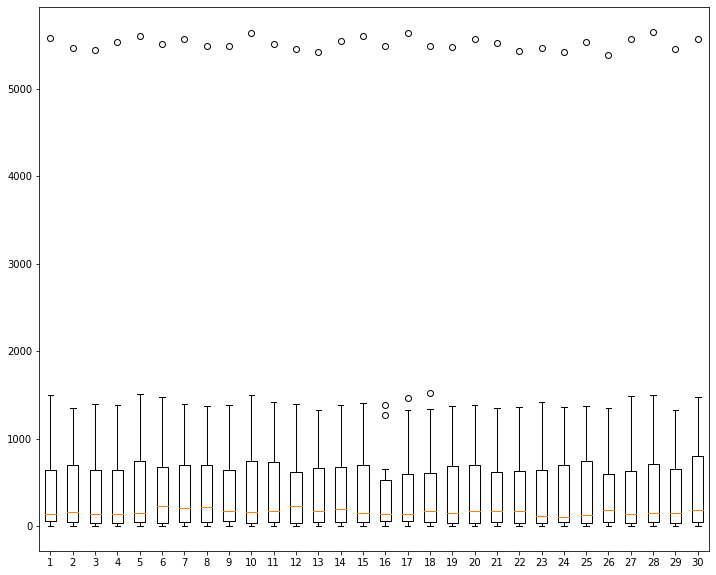

In [11]:
plt.figure(figsize=(12,10))
plt.boxplot(df)
#There seems to very few outliers in the column which needs to be treated later.

## Bivariate Analysis

In [12]:
df.columns

Index(['wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average', 'Complete Game', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

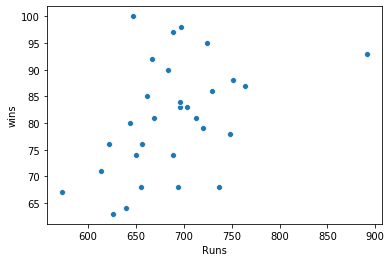

In [13]:
sns.scatterplot(x='Runs',y='wins',data=df)
#Runs and wins show a positive correlation

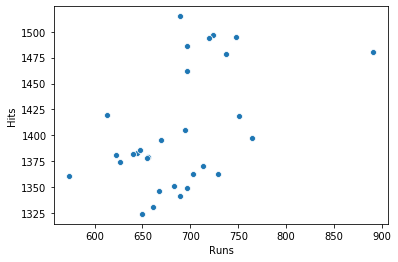

In [14]:
sns.scatterplot(x='Runs',y='Hits',data=df)
#runs and hits also show a positive correlation

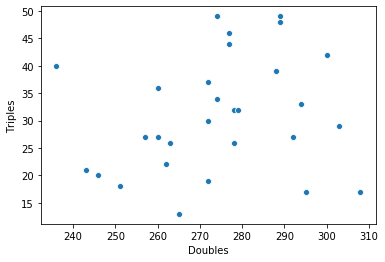

In [15]:
sns.scatterplot(x='Doubles',y='Triples',data=df)

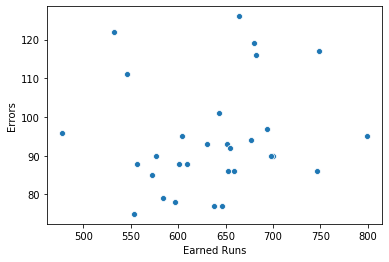

In [16]:
sns.scatterplot(x='Earned Runs',y='Errors',data=df)

## Correlation

In [17]:
df.corr()

,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors
wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


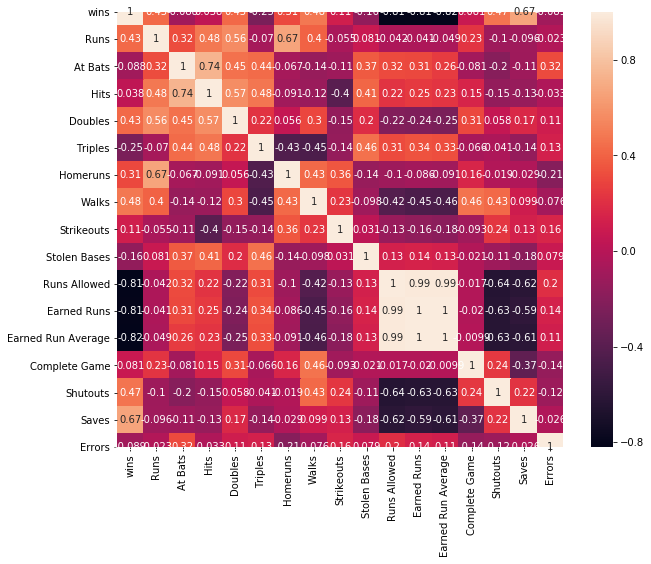

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Observation:-
1. At Bats and hits have a positive correlation.
2. Doubles and triples have positive correlation with hits.
3. Walks have positive correlation with complete game and shutouts.
4. Wins have negative correlation with Runs Allowed, Earned Runs and Earned Runs Average.
5. Shutouts have negative correlation with Earned Runs, Runs Allowed and Earned Runs Average.
6. Wins have positive correlation with walks, saves, shutouts, doubles and runs.

### Statistical Analysis

In [19]:
df.describe()

,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations:-
1. The mean and median of most of the attributes are very close to each other.
2. There seems no much outliers which needs to be analysed further.


### Preprocessing the data

In [20]:
#Removing the outliers
print("The shape before removing the outliers", df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("The shape after removing the outliers",df.shape)
df.head()

The shape before removing the outliers (30, 17)
The shape after removing the outliers (29, 17)


,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [21]:
#checking the skewness
df.skew()

wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shutouts              0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

In [22]:

#treating the skewness using sqrt method
for i in df.columns:
    if df.skew()[i]>0.55:
        df[i]=np.sqrt(df[i])
        
#df['Hits']=np.sqrt(df['Hits'])
#df['Complete Game']=np.sqrt(df['Complete Game'])
#df['Saves']=np.sqrt(df['Saves'])
#df['Errors']=np.sqrt(df['Errors'])


In [23]:
#checking the skewness again
df.skew()
#This has reduced the skewness to some extent.

wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.761274
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.260678
Shutouts              0.526943
Saves                 0.370280
Errors                0.714966
dtype: float64

### Separating the target and input variables


In [24]:
x=df.iloc[:,1:]
y=pd.DataFrame(df.iloc[:,0])
print(x.shape)
print()
print(y.shape)

(29, 16)

(29, 1)


### Scaling the data

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.790576,0.719697,0.908557,0.955224,0.805556,0.300000,0.041667,0.000000,0.666667,0.363636,0.383178,0.376190,0.426401,0.235294,0.848715,0.280958
1,0.643979,0.310606,0.134818,0.611940,0.861111,0.430769,0.333333,0.533945,0.288889,0.548589,0.545171,0.538095,0.426401,0.470588,0.548576,0.239155
2,0.502618,0.204545,0.379659,1.000000,0.444444,0.315385,0.822917,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.338010,0.088875
3,0.256545,0.560606,0.305575,0.358209,0.388889,0.276923,0.151042,0.473394,0.266667,0.551724,0.514019,0.495238,0.797724,0.294118,0.306392,0.541822
4,0.607330,0.833333,1.000000,0.791045,1.000000,0.392308,0.416667,0.524771,0.433333,0.871473,0.834891,0.809524,0.797724,0.470588,0.241849,0.239155


In [26]:
y.head()

,wins
0,95
1,83
2,81
3,76
4,74


### Selecting the best r_state for train test and split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("The r2 score", r2score, "is achieved at r_state", r_state)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at r_state", final_r_state)
    return final_r_state
        

In [28]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The r2 score 0.457308110853482 is achieved at r_state 42
The r2 score -3.284232310038628 is achieved at r_state 43
The r2 score 0.3657801704485196 is achieved at r_state 44
The r2 score 0.2551930464497736 is achieved at r_state 45
The r2 score 0.7642035978491319 is achieved at r_state 46
The r2 score -0.12483636941158172 is achieved at r_state 47
The r2 score -0.11804488532678303 is achieved at r_state 48
The r2 score -0.4406680216109249 is achieved at r_state 49
The r2 score 0.8019666158353888 is achieved at r_state 50
The r2 score 0.5975425683659261 is achieved at r_state 51
The r2 score 0.3553676804005327 is achieved at r_state 52
The r2 score 0.34378978594405596 is achieved at r_state 53
The r2 score -0.08833802640201127 is achieved at r_state 54
The r2 score 0.7097837641357312 is achieved at r_state 55
The r2 score 0.6751149472859896 is achieved at r_state 56
The r2 score 0.6388639060403809 is achieved at r_state 57
The r2 score 0.5979178685771389 is achieved at r_state 58
The r2 

73

In [29]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=73,test_size=0.20)

In [30]:
#Lets check the cross val score for the same
from sklearn.model_selection import cross_val_score
lrcrossval=cross_val_score(lr,x,y,cv=5, scoring='r2').mean()
print("The cross val score of the linear regression is", lrcrossval)

The cross val score of the linear regression is -0.021906990312963125


In [31]:
#Since the Cross val score is negative, we need to check the other models and its performance.
import warnings
warnings.filterwarnings('ignore')

In [32]:
#using GridSearchCV to select best parameter for the models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'mse'}

In [34]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'linear'}

In [35]:
score=[]
cv=[]
Mean=[]
Root=[]

models=[lr,KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mse'),SVR(C=10,kernel='linear')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print(i)
    print("")
    print("The r2 score is ", r2score)
    cross=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cross)
    print("")
    print("The cross validation score is", cross)
    print()
    Meanerror=mean_absolute_error(test_y,pred)
    Mean.append(Meanerror)
    print("The mean absolute error is ", Meanerror)
    rmse=np.sqrt(Meanerror)
    Root.append(rmse)
    print()
    print("The root mean square error is", rmse)
    print()
    print()
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The r2 score is  0.8613344394914262

The cross validation score is -0.021906990312963125

The mean absolute error is  3.7241241131766145

The root mean square error is 1.9297989825825421


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

The r2 score is  0.5953605015673982

The cross validation score is -0.2708231388654642

The mean absolute error is  6.599999999999999

The root mean square error is 2.569046515733026


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

T

In [36]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.861334,-0.021907,3.724124,1.929799
1,KNeighborsRegressor,0.595361,-0.270823,6.600000,2.569047
2,DecisionTreeRegressor,0.625078,-2.026996,5.166667,2.273030
3,SVR,0.674907,0.270220,5.387186,2.321031


#The cross val score for all the models are either negative or too low. Let us try regularisation techniques, Lasso and Ridge regressions

### Lasso

In [37]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(train_x,train_y)
gdls.best_params_

{'alpha': 0.1}

In [38]:
#Lets check the r2 score for lasso
ls=Lasso(alpha=0.1)
max_r2_score(ls,x,y)

The r2 score 0.7317571806042364 is achieved at r_state 42
The r2 score 0.5350876051294294 is achieved at r_state 43
The r2 score 0.8103979625484403 is achieved at r_state 44
The r2 score 0.5540443801757587 is achieved at r_state 45
The r2 score 0.9149110490607509 is achieved at r_state 46
The r2 score 0.9455593796495969 is achieved at r_state 47
The r2 score 0.734074541577484 is achieved at r_state 48
The r2 score -0.057477754636321876 is achieved at r_state 49
The r2 score 0.7432804164536847 is achieved at r_state 50
The r2 score 0.5771870297640592 is achieved at r_state 51
The r2 score 0.43074233949955365 is achieved at r_state 52
The r2 score 0.8079157221792673 is achieved at r_state 53
The r2 score 0.7110500532019006 is achieved at r_state 54
The r2 score 0.7884838936763449 is achieved at r_state 55
The r2 score 0.5869938408547117 is achieved at r_state 56
The r2 score 0.8283425924162691 is achieved at r_state 57
The r2 score 0.6447257399722288 is achieved at r_state 58
The r2 scor

75

In [39]:
#Lets check the cross val score
cvscore=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)


The cross validation score is 0.4792613962491137


### Ridge

In [40]:
#2. Ridge
#Lets check the best parameters for ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(train_x,train_y)
grd.best_params_

{'alpha': 1}

In [41]:
#Lets check the r2 score for ridge
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The r2 score 0.5809534137623222 is achieved at r_state 42
The r2 score 0.38460909964554646 is achieved at r_state 43
The r2 score 0.6758928746474706 is achieved at r_state 44
The r2 score 0.5236345408613414 is achieved at r_state 45
The r2 score 0.9195391224962532 is achieved at r_state 46
The r2 score 0.8198535477697579 is achieved at r_state 47
The r2 score 0.6365754097866401 is achieved at r_state 48
The r2 score -0.4651890770122977 is achieved at r_state 49
The r2 score 0.5865486400978652 is achieved at r_state 50
The r2 score 0.6307093902236585 is achieved at r_state 51
The r2 score 0.47022153606972183 is achieved at r_state 52
The r2 score 0.6793736755567938 is achieved at r_state 53
The r2 score 0.64503840863132 is achieved at r_state 54
The r2 score 0.6132671888270088 is achieved at r_state 55
The r2 score 0.5864524227349315 is achieved at r_state 56
The r2 score 0.7202887185023693 is achieved at r_state 57
The r2 score 0.5584886890901657 is achieved at r_state 58
The r2 score 

46

In [42]:
#Lets check the cross val score
cvscore=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)


The cross validation score is 0.2923676017856522


### Ensemble Techniques

### RandomForest

In [43]:
#Since the cross validation score is low, we can try to boost the model by using ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [44]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500), 'criterion':('mse','mae')}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'criterion': 'mae', 'n_estimators': 50}

In [45]:
#Lets check the r2 score 
rf=RandomForestRegressor(criterion='mae',n_estimators=50)
max_r2_score(rf,x,y)

The r2 score 0.47081937716263034 is achieved at r_state 42
The r2 score 0.002807217058501732 is achieved at r_state 43
The r2 score 0.7118880000000001 is achieved at r_state 44
The r2 score 0.009377256317689153 is achieved at r_state 45
The r2 score 0.8370346276838738 is achieved at r_state 46
The r2 score 0.7405860915492958 is achieved at r_state 47
The r2 score 0.7167783711615487 is achieved at r_state 48
The r2 score -0.59160014342058 is achieved at r_state 49
The r2 score 0.18436608391608433 is achieved at r_state 50
The r2 score 0.7277057286432163 is achieved at r_state 51
The r2 score 0.4869035265989241 is achieved at r_state 52
The r2 score 0.5917671585557297 is achieved at r_state 53
The r2 score 0.6952768683274024 is achieved at r_state 54
The r2 score 0.5500697303456131 is achieved at r_state 55
The r2 score 0.2427940992400538 is achieved at r_state 56
The r2 score 0.5220813238770683 is achieved at r_state 57
The r2 score -0.03561656210790387 is achieved at r_state 58
The r2 

46

In [46]:
#Lets check the cross val score
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is -0.44382919615722843


### GradientBoostingRegressor

In [47]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'loss':('ls','lad','huber','quantile'), 'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500,1000), 'criterion':('friedman_mse', 'mse', 'mae')}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_                                                                                                                                         

{'criterion': 'mae',
 'learning_rate': 0.01,
 'loss': 'lad',
 'n_estimators': 1000}

In [48]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(criterion='mae',n_estimators=1000,learning_rate=0.01,loss='lad')
max_r2_score(gb,x,y)

The r2 score 0.3058383724496876 is achieved at r_state 42
The r2 score 0.2683020291878935 is achieved at r_state 43
The r2 score 0.8185021647765705 is achieved at r_state 44
The r2 score 0.11091651404749947 is achieved at r_state 45
The r2 score 0.8590233616099349 is achieved at r_state 46
The r2 score 0.7432273599203241 is achieved at r_state 47
The r2 score 0.7274661923347108 is achieved at r_state 48
The r2 score -1.086420025669462 is achieved at r_state 49
The r2 score 0.26705885017057185 is achieved at r_state 50
The r2 score 0.6056089537753104 is achieved at r_state 51
The r2 score 0.3543990417726779 is achieved at r_state 52
The r2 score 0.5387274549721845 is achieved at r_state 53
The r2 score 0.5525220703099788 is achieved at r_state 54
The r2 score 0.5076247837277541 is achieved at r_state 55
The r2 score 0.4077707825334619 is achieved at r_state 56
The r2 score 0.6526366425280683 is achieved at r_state 57
The r2 score 0.23391925010828407 is achieved at r_state 58
The r2 scor

46

In [49]:
#Lets check the cross val score
cvscore=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is -0.49961534631010984


### AdaBoostRegressor

In [50]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1),'loss':('linear','square','exponential')}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.001, 'loss': 'exponential', 'n_estimators': 100}

In [51]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=100,learning_rate=0.001,loss='exponential')
max_r2_score(ad,x,y)

The r2 score 0.5086745482506727 is achieved at r_state 42
The r2 score 0.10779013020675143 is achieved at r_state 43
The r2 score 0.5573148148148155 is achieved at r_state 44
The r2 score -0.3201150722021662 is achieved at r_state 45
The r2 score 0.7283005938784833 is achieved at r_state 46
The r2 score 0.7524207746478874 is achieved at r_state 47
The r2 score 0.7617968402314197 is achieved at r_state 48
The r2 score -0.8530311043384722 is achieved at r_state 49
The r2 score 0.027097902097902193 is achieved at r_state 50
The r2 score 0.3060502512562814 is achieved at r_state 51
The r2 score -0.249839609483961 is achieved at r_state 52
The r2 score 0.5945308578690505 is achieved at r_state 53
The r2 score 0.462307236061685 is achieved at r_state 54
The r2 score 0.48354526922808605 is achieved at r_state 55
The r2 score -0.07789450156459554 is achieved at r_state 56
The r2 score 0.5398854084581035 is achieved at r_state 57
The r2 score -0.21250731911334153 is achieved at r_state 58
The r

86

In [52]:
#Lets check the cross val score
cvscore=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is -1.3237503431428574


In [53]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.947,0.919,0.83,0.859,0.823],'Cross_val_score':[0.479,0.292,-0.443,-0.499,-1.32]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.947,0.479
1,Ridge,0.919,0.292
2,RandomForestRegressor,0.830,-0.443
3,GradientBoostRegressor,0.859,-0.499
4,AdaBoostRegressor,0.823,-1.320


In [54]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.861334,-0.021907,3.724124,1.929799
1,KNeighborsRegressor,0.595361,-0.270823,6.600000,2.569047
2,DecisionTreeRegressor,0.625078,-2.026996,5.166667,2.273030
3,SVR,0.674907,0.270220,5.387186,2.321031


Conclusion
1. After comparing the scores of models, regularisation and ensemble techniques, we can select the regularisation model Lasso with comparitively better cross_val_score. 

In [55]:
#Finalising the model
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=75,test_size=0.20)
ls=Lasso(alpha=0.1)
ls.fit(train_x,train_y)
pred=ls.predict(test_x)
r2score=r2_score(test_y,pred)
cv=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)
pd.DataFrame(pred).to_csv("Project2_Baseballpredictions.csv")

The accuracy score is 0.9473279231175609
The cross val score is 0.4792613962491137


In [56]:
#saving the model
from sklearn.externals import joblib
joblib.dump(ls,'Project2_Baseball.pkl')

['Project2_Baseball.pkl']